# Python Script to Plot Geological Well logs

This is my python function that plots geological well logs in a *slightly* more physically appealing way. Only the first version! I will continue to add more features.

In this version, I focussed on plotting my caliper in a way that makes it easy to identify hole issues. I have normalized the caliper log, but this is an optional step.

## Import Libraries

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
import pandas as pd

## Generate a random well log data

For our purpose, I assume a well with a total depth of 100m, with 8in hole size and with some washouts. Since I have only generated random numbers for each log with no dependence from one log to another, these numbers have no physical meaning whatsoever. ***This is only for display purpose!***

In [2]:
# Choose a random name for the well. Maybe not so random ;)!
well_name = ['Taiwo-FA-01']*101

# Generate a depth index
depth = np.arange(0,101,1)

# Generate a caliper log. 
cal = np.empty(101)
cal.fill(8)
noise = np.random.normal(0, .1, cal.shape) # Add noise to caliper log
cal = cal + noise
washout = np.random.uniform(0, 1, size=cal[0:5].shape) # Add washout
cal[20:25] = cal[20:25] + washout
cal[70:75] = cal[70:75] + washout

# Generate a Gamma log
gam = random.sample(range(0, 120), 101)

# Generate a Resistivity log
res = np.random.uniform(0.2, 200, size=(101,))

# Generate a Density log
den = np.random.uniform(0.95, 2.95, size=(101,))

# Generate a Neutron Porosity log
neu = np.random.uniform(-0.15, 0.45, size=(101,))

### Combine well logs into a dataframe

In [3]:
# Create empty dataframe to hold well logs
well_data = pd.DataFrame([])

# Assign log data to columns in well dataframe
well_data['well_name'] = well_name
well_data['depth'] = depth
well_data['cal'] = cal
well_data['gam'] = gam
well_data['res'] = res
well_data['den'] = den
well_data['neu'] = neu

# Display first 5 rows of dataframe
well_data.head()

,well_name,depth,cal,gam,res,den,neu
0,Taiwo-FA-01,0,8.131781,53,85.697323,2.159896,0.359291
1,Taiwo-FA-01,1,8.000308,9,145.880983,2.503284,0.240204
2,Taiwo-FA-01,2,8.098934,44,22.504925,1.527263,0.433643
3,Taiwo-FA-01,3,7.960732,7,74.611230,1.773474,0.411593
4,Taiwo-FA-01,4,8.022654,55,112.924933,2.611153,0.005810


## Define Plot Function

In [4]:
def plot_well(dataset, name_of_well):
    
    if name_of_well in set(dataset.well_name): # Check to see if well is in the list of well data provided
        data = dataset[dataset.well_name == name_of_well]
        logs = ['cal','gam','res','den','neu']
        fig, ax = plt.subplots(1,5,figsize = (15,10),sharey=True)
        
        # Plot Caliper log
        # Normalize and shift caliper logs to optimize display
        cal1=1.25 - (data.cal/max(data.cal))
        cal2=(data.cal/max(data.cal))-0.25 
        ax[0].plot(cal1,data.depth,'k-', linewidth='0.7')
        ax[0].set_xlim(0.1, 0.9)        
        ax2=ax[0].twiny()
        ax2.plot(cal2,data.depth,'k-', linewidth='0.7')
        ax2.set_xlim(0.1, 0.9)
        ax[0].fill_betweenx(data.depth, cal1, cal2, color = 'grey', linewidth=0, alpha=.75)
        ax[0].set_title('Caliper', fontsize=14) # assign title
        
        # Plot Gamma ray log
        left_col_value = 0
        right_col_value = 150
        gr_span = abs(left_col_value - right_col_value) #calculate the span of values
        gr_cmap = plt.get_cmap('RdYlGn') #assign a color map
        gr_color_index = np.arange(left_col_value, right_col_value, gr_span / 100) #create array of color values
        ax[1].plot(data.gam,data.depth,'g-', linewidth='0.7')
        ax[1].set_xlabel('Gamma Ray', color='g', fontsize=14) # assign title
        ax[1].tick_params(axis='x', colors='g')
        for index in sorted(gr_color_index): #loop through each value in the color_index
            index_value = (index - left_col_value) / gr_span
            color = gr_cmap(index_value)
            ax[1].fill_betweenx(data.depth, 0, data.gam, where=(data.gam>=index), color = color, linewidth=0, alpha=.75)
        
        # Plot Resistivity log
        ax[2].plot(data.res,data.depth,'r-', linewidth='0.7')
        ax[2].set_xscale('log')
        ax[2].fill_betweenx(data.depth, 100, data.res, where=(data.res>=100), color = 'red', linewidth=0, alpha=.75)
        ax[2].set_xlabel('Resistvity', color='r', fontsize=14) # assign title
        ax[2].tick_params(axis='x', colors='r')
        
        # Plot Density log  
        ax[3].plot(data.den,data.depth,'b-', linewidth='0.7')        
        ax[3].fill_betweenx(data.depth, 1.65, data.den, where=(data.den<=1.65), color = 'blue', linewidth=0, alpha=.75)
        ax[3].set_xlabel('Density', color='b', fontsize=14)
        ax[3].tick_params(axis='x', colors="blue")
        ax[3].spines["top"].set_edgecolor("blue")
        
        # Plot Neutron Log
        ax[4].plot(data.neu,data.depth,'m-', linewidth='0.7')
        ax[4].set_xlabel('Neutron', color='m', fontsize=14) # assign title
        ax[4].tick_params(axis='x', colors='m')
               
        # Set other plot parameters
        fig.suptitle(f'Well: {name_of_well}', fontsize=15)
        fig.text(0.08, 0.5, 'Depth', va='center', rotation='vertical', fontsize=15)
        for i, j in zip(logs, range(len(ax))):
            ax[j].set_ylim(max(data.depth), min(data.depth))
            ax[j].minorticks_on()
            ax[j].xaxis.tick_top()
            ax[j].xaxis.set_label_position("top")
            ax[j].grid(which='major', linestyle='-', linewidth='0.5', color='green')
            ax[j].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
            #ax[j].set_title(f'{i}\n', fontsize=15)
        plt.subplots_adjust(wspace=0)
    else:
        print('Well not found in list')

## Plot Well

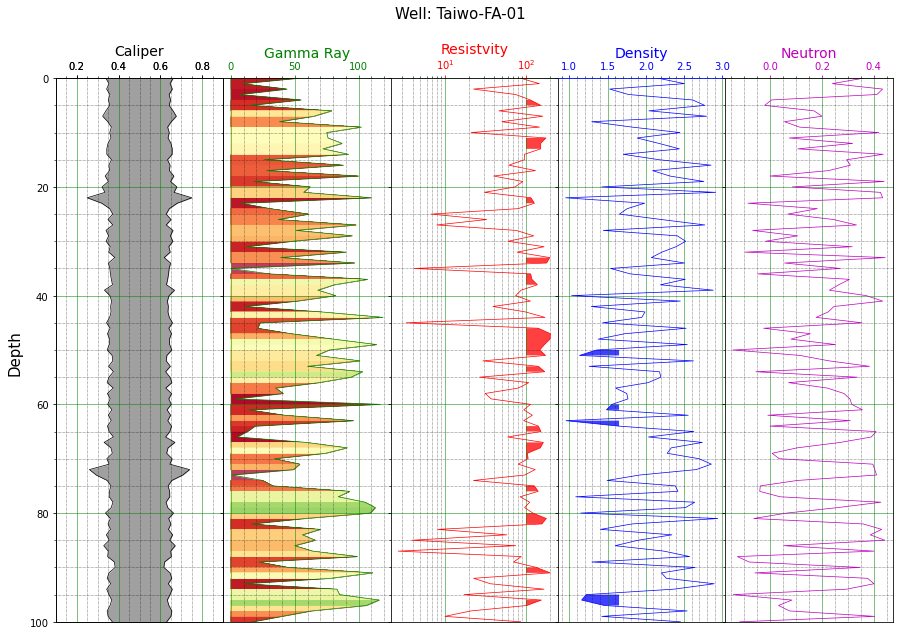

In [5]:
plot_well(well_data,'Taiwo-FA-01')

## Author

Taiwo Fawumi

taiwo.fawumi@yahoo.com

Credits: Andy McDonald

Version #1 : Published Nov.,2021